In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data_dausare.csv")
data = data.set_index('Datetime')
data.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.707856,939.029205,835.370973,113.075515,1022.780725,18.316054,49.232360,1.025530
std,217.084571,266.829000,256.815106,48.359250,398.480897,8.832888,17.316389,0.403813
min,647.250000,383.250000,322.000000,2.000000,221.000000,-1.900000,9.175000,0.184679
25%,936.750000,734.375000,657.875000,78.000000,731.375000,11.787500,35.812500,0.736769
50%,1063.000000,909.000000,805.500000,109.000000,963.250000,17.750000,49.550000,0.995395
75%,1231.250000,1116.250000,969.250000,142.000000,1273.375000,24.400000,62.500001,1.313701
max,2039.750000,2214.000000,2682.750000,339.700000,2522.750000,44.600000,88.725000,2.231036


In [3]:
data = data.dropna(subset=["NO2(GT)"])
data = data.dropna(subset=["T"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7393 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7393 non-null   float64
 1   PT08.S2(NMHC)  7393 non-null   float64
 2   PT08.S3(NOx)   7393 non-null   float64
 3   NO2(GT)        7393 non-null   float64
 4   PT08.S5(O3)    7393 non-null   float64
 5   T              7393 non-null   float64
 6   RH             7393 non-null   float64
 7   AH             7393 non-null   float64
dtypes: float64(8)
memory usage: 519.8+ KB


In [4]:
import tensorflow as tf
import os
import random
import seaborn as sns
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import L1

warnings.filterwarnings("ignore")
tfk = tf.keras
tfkl = tf.keras.layers
tf.config.set_visible_devices([], 'GPU') #disables GPU
print(tf.__version__)

2.12.0


In [5]:
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=seed, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=seed, shuffle=True)

In [10]:
input_shape = X_train.shape[1:]
input_shape

(7,)

#NN

In [6]:
from sklearn.preprocessing import MinMaxScaler

target = pd.DataFrame(data['NO2(GT)'])
X = data.drop(['NO2(GT)'], axis=1)
print('NO2 data_normset shape',X.shape)
print('Target shape', target.shape)
X.describe()

scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=X.columns)

#do the same for y

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(target) 
y_scaled = pd.DataFrame(y_scaled, columns=target.columns)


y_scaled.describe()   
x_scaled.describe()

NO2" data_normset shape (7393, 7)
Target shape (7393, 1)


,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S5(O3),T,RH,AH
count,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000,7393.000000
mean,0.333748,0.309864,0.212836,0.358246,0.427159,0.497782,0.405859
std,0.156757,0.144993,0.108836,0.176336,0.193585,0.219921,0.202238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217056,0.199918,0.138304,0.228956,0.283333,0.326210,0.257746
50%,0.309156,0.295917,0.198877,0.334419,0.408602,0.500629,0.390793
75%,0.430162,0.406527,0.267923,0.471924,0.558065,0.666248,0.544303
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
def build_model():
    model=keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=input_shape),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    #No activation is used in the last layer as this is regression
    optimizer= tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss='mse',
                 optimizer= optimizer,
                 metrics= ['mae', 'mse'])
    return model

In [30]:
model= build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1024      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min', restore_best_weights=False)

history= model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_val, y_val),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model.evaluate(X_test, y_test, verbose=2)

print("Test-set Mean absolute error: {:5.2f}".format(mae)) 

Epoch 111: early stopping
47/47 - 0s - loss: 0.0030 - mae: 0.0406 - mse: 0.0030 - 71ms/epoch - 2ms/step
Test-set Mean absolute error:  0.04


In [32]:
y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

47/47 [==============================] - 0s 3ms/step
MSE 0.003018056568860402
R2 0.8497815950156261


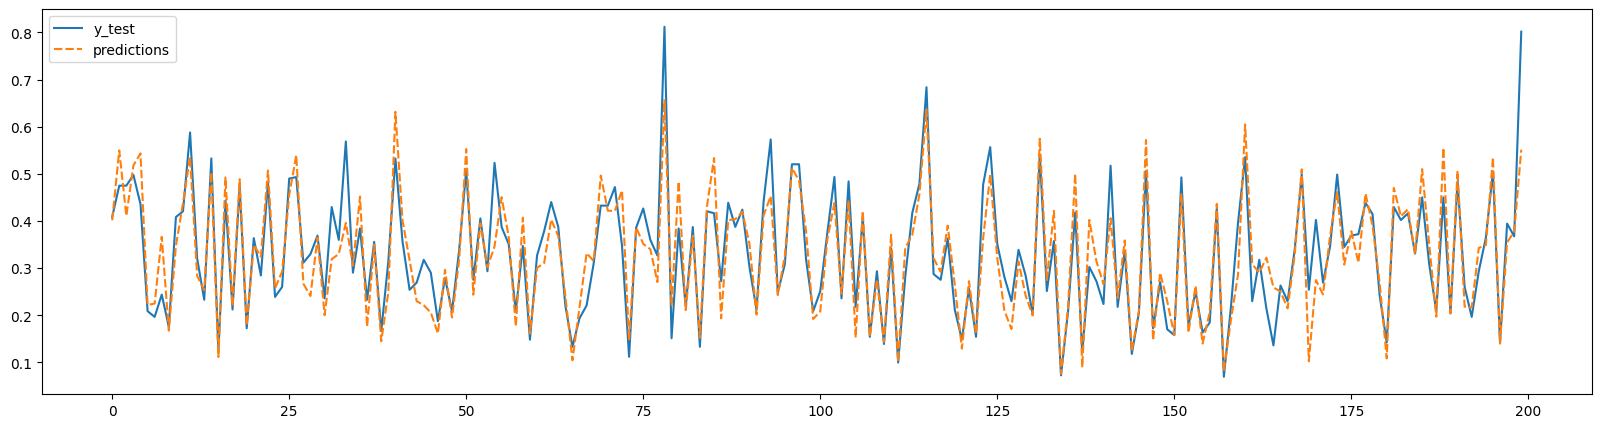

In [33]:
aux = pd.DataFrame()
aux['y_test'] = y_test.values.flatten()
aux['predictions'] = y_pred.flatten()

plt.figure(figsize=(20, 5))
sns.lineplot(data=aux.iloc[:200, :])
plt.show()

#Tuning 

In [59]:

def build(hp):
        model= keras.Sequential()
        
        # Tune the number of units in the first Dense layer
        # Defining dense units as a close approx to the original neural network to perform a fair comparision!
        
        
        hp_units_1= hp.Int('units_1', min_value=32, max_value= 160, step=32)
        hp_units_2= hp.Int('units_2', min_value=32, max_value= 128, step=32)
        hp_units_3= hp.Int('units_3', min_value=32, max_value= 64, step=16)

        model.add(keras.layers.Dense(units=hp_units_1, activation='relu', input_shape= input_shape))
        model.add(keras.layers.Dense(units=hp_units_2, activation='relu'))
        model.add(keras.layers.Dense(units=hp_units_3, activation='relu'))
        model.add(keras.layers.Dense(1))

        # Tune the learning rate for the optimizer 
        hp_learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default= 0.0005)

        model.compile(loss='mse',
                    optimizer= keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    metrics= ['mae','mse']
                     )

        return model


In [63]:
MAX_TRIALS = 20
tuner= RandomSearch(build,
               objective= 'val_mse',
               max_trials= MAX_TRIALS,
               #executions_per_trial= EXECUTION_PER_TRIAL,
               directory= 'random_search',
               project_name='houseprices',
               overwrite=True)

In [66]:
print('searching for the best params!')

tuner.search(x= X_train,
             y= y_train,
             epochs=100,
             batch_size= 64,
             validation_data= (X_val, y_val),
             verbose=0,
             callbacks= []
            )

# Retreive the optimal hyperparameters
best_hps= tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

searching for the best params!


In [67]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the 
first densely-connected layer is {best_hps.get('units_1')},
second layer is {best_hps.get('units_2')} 
third layer is {best_hps.get('units_3')}  

and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the 
first densely-connected layer is 160,
second layer is 96 
third layer is 48  

and the optimal learning rate for the optimizer
is 0.0006799686297603734.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
tuned_model = tuner.hypermodel.build(best_hps)

# Check result using best model
history_tuned= tuned_model.fit(X_train, y_train, 
          epochs = 200, 
          validation_data = (X_val, y_val),
          verbose=0,
          callbacks= early_stopping_cb)


In [71]:
y_pred=tuned_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

47/47 [==============================] - 0s 1ms/step
MSE 0.0029040453317032747
R2 0.85545630183615


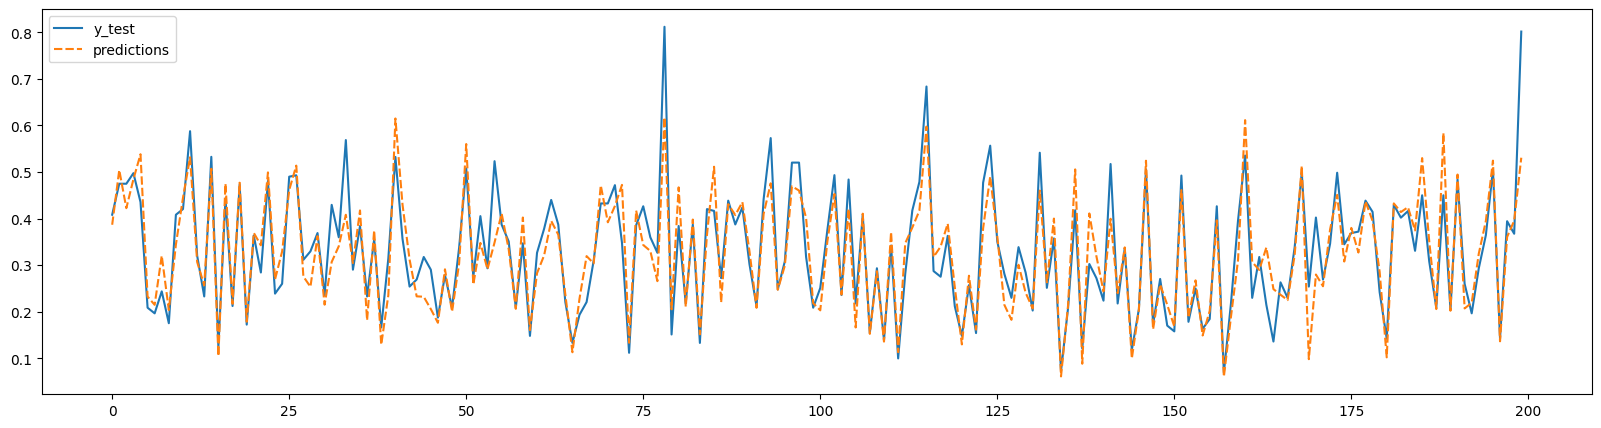

In [72]:
aux = pd.DataFrame()
aux['y_test'] = y_test.values.flatten()
aux['predictions'] = y_pred.flatten()

plt.figure(figsize=(20, 5))
sns.lineplot(data=aux.iloc[:200, :])
plt.show()